In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, MaxPool2D, Conv2D, Flatten
from tensorflow.keras import Sequential
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [2]:
!pip install pandas

In [4]:
for dirname, _, filenames in os.walk('D:/brain'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/brain\no\1 no.jpeg
D:/brain\no\10 no.jpg
D:/brain\no\11 no.jpg
D:/brain\no\12 no.jpg
D:/brain\no\13 no.jpg
D:/brain\no\14 no.jpg
D:/brain\no\15 no.jpg
D:/brain\no\17 no.jpg
D:/brain\no\18 no.jpg
D:/brain\no\19 no.jpg
D:/brain\no\2 no.jpeg
D:/brain\no\20 no.jpg
D:/brain\no\21 no.jpg
D:/brain\no\22 no.jpg
D:/brain\no\23 no.jpg
D:/brain\no\24 no.jpg
D:/brain\no\25 no.jpg
D:/brain\no\26 no.jpg
D:/brain\no\27 no.jpg
D:/brain\no\28 no.jpg
D:/brain\no\29 no.jpg
D:/brain\no\3 no.jpg
D:/brain\no\30 no.jpg
D:/brain\no\31 no.jpg
D:/brain\no\32 no.jpg
D:/brain\no\33 no.jpg
D:/brain\no\34 no.jpg
D:/brain\no\35 no.jpg
D:/brain\no\36 no.jpg
D:/brain\no\37 no.jpg
D:/brain\no\38 no.jpg
D:/brain\no\39 no.jpg
D:/brain\no\4 no.jpg
D:/brain\no\40 no.jpg
D:/brain\no\41 no.jpg
D:/brain\no\42 no.jpg
D:/brain\no\43 no.jpg
D:/brain\no\44no.jpg
D:/brain\no\45 no.jpg
D:/brain\no\46 no.jpg
D:/brain\no\47 no.jpg
D:/brain\no\48 no.jpeg
D:/brain\no\49 no.jpg
D:/brain\no\5 no.jpg
D:/brain\no\50 no.jpg
D:/brain\no\6

In [5]:
def get_image(image_path):
    """
    This function takes the address of the image as input and returns the pixesl values of the image
    """
    image = Image.open(image_path, "r").convert('RGB')
    image = image.resize((300 ,300))
    width, height = image.size
    pixel_values = list(image.getdata())
    if image.mode == "RGB":
        channels = 3
    elif image.mode == "L":
        channels = 1
    else:
        print("Unknown mode: %s" % image.mode)
        return None
    pixel_values = np.array(pixel_values).reshape((height, width, channels))
    return pixel_values

In [6]:
# Here we are passing every image address to the function to generate pixels

a=[]
b=[]
for dirname, _, filenames in os.walk('D:/brain'):
    for filename in filenames:
        s = str(os.path.join(dirname, filename))
        img = get_image(s)
        a.append(img)
        b.append(0 if dirname.split('/')[-1]=='no' else 1)

brain\no


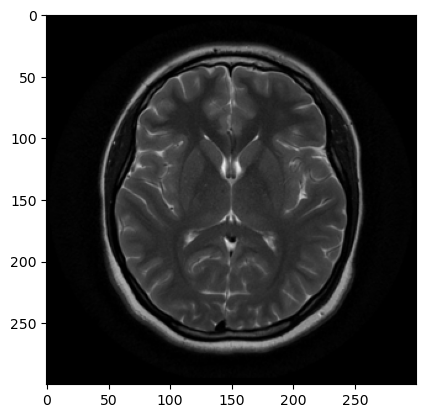

brain\test


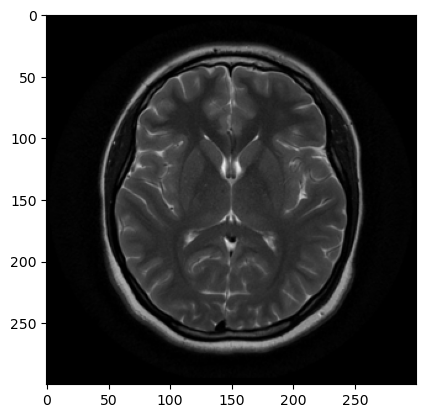

brain\yes


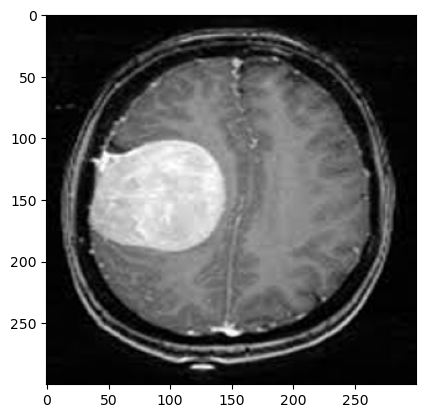

In [7]:
for dirname, _, filenames in os.walk('D:/brain'):
    for filename in filenames:
        s = str(os.path.join(dirname, filename))
        print(dirname.split('/')[-1])
        img = get_image(s)
        plt.imshow(img)
        plt.show()
        break

In [34]:
# Converting the lists to numpy arrays
a = np.array(a, dtype='float32')
b = np.array(b)

In [35]:
X = a
y = b

# Normalizing pixal values so that the pixels will be in the range of [0, 1]
X/=255

In [36]:
# Creating a Sequential model with 2 Con2D and MaxPool2d Layers

def get_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=X[0].shape))
    model.add(MaxPool2D((3,3)))
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X[0].shape))
    model.add(MaxPool2D((3,3)))
    model.add(Flatten(input_shape = X[0].shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
    return model


In [37]:
get_model().summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 97, 97, 32)        18464     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2097216   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [38]:
#history = model.fit(X, y, validation_split=0.25, epochs=20, batch_size=32)

In [39]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_model = get_model()
    history=cpu_model.fit(X, y, validation_split=0.25, epochs=5, batch_size=32)

Epoch 1/5
6/6 [==============================] - 7s 1s/step - loss: 0.1276 - accuracy: 0.8333 - val_loss: 6.7035e-13 - val_accuracy: 1.0000
Epoch 2/5
6/6 [==============================] - 7s 1s/step - loss: 1.5159e-12 - accuracy: 1.0000 - val_loss: 1.2420e-23 - val_accuracy: 1.0000
Epoch 3/5
6/6 [==============================] - 7s 1s/step - loss: 1.1658e-16 - accuracy: 1.0000 - val_loss: 4.1099e-31 - val_accuracy: 1.0000
Epoch 4/5
6/6 [==============================] - 7s 1s/step - loss: 2.0962e-21 - accuracy: 1.0000 - val_loss: 6.5208e-36 - val_accuracy: 1.0000
Epoch 5/5
6/6 [==============================] - 7s 1s/step - loss: 3.4663e-25 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
42 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [40]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    history=cpu_model.fit(X, y, validation_split=0.25, epochs=5, batch_size=32)

Epoch 1/5
6/6 [==============================] - 7s 1s/step - loss: 0.1174 - accuracy: 0.9167 - val_loss: 1.3085e-12 - val_accuracy: 1.0000
Epoch 2/5
6/6 [==============================] - 7s 1s/step - loss: 4.0369e-11 - accuracy: 1.0000 - val_loss: 3.2334e-21 - val_accuracy: 1.0000
Epoch 3/5
6/6 [==============================] - 7s 1s/step - loss: 5.4098e-19 - accuracy: 1.0000 - val_loss: 4.6824e-27 - val_accuracy: 1.0000
Epoch 4/5
6/6 [==============================] - 7s 1s/step - loss: 1.4638e-19 - accuracy: 1.0000 - val_loss: 9.0667e-31 - val_accuracy: 1.0000
Epoch 5/5
6/6 [==============================] - 7s 1s/step - loss: 7.0338e-23 - accuracy: 1.0000 - val_loss: 4.9270e-33 - val_accuracy: 1.0000
41.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [41]:
# Summarize history for accuracy
plt.history.history['accuracy'])
plt.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.history.history['loss'])
plt.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

SyntaxError: unmatched ')' (Temp/ipykernel_2712/998463862.py, line 2)

In [46]:
get_model().save('Brain_model3.h5')

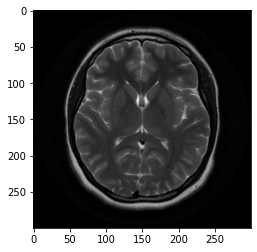

In [47]:
test = []
test.append(X[100])
test = np.array(test)
round(get_model().predict(test)[0][0])
plt.imshow(X[100])
plt.show()

In [50]:
y[12]

1

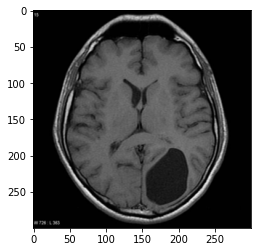

In [54]:
test = []
test.append(X[50])
test = np.array(test)
round(get_model().predict(test)[0][0])
plt.imshow(X[50])
plt.show()

In [55]:
y[50]

1

In [8]:
from flask import jsonify
from keras.preprocessing import image
from keras.models import load_model
print('making model ')
#from google.colab import files
image1 = 'D:/brain/yes/Y1.jpg'
#image_list = list(image1.keys())
#image1 = image_list[0]
print('Image : ',image1)



import numpy as np
from flask import jsonify
from keras.preprocessing import image
from keras.models import load_model

print('fetching results...')
new_model = load_model('C:/Users/HP/aca/Brain_model1.h5')
test_image = image.load_img(image1,target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = new_model(test_image)
print('Results : ',result)
y_pred = np.argmax(result, axis=1)
print('Model prediction: ',result)
#if result[0][0]<result[0][1] and result[0][0]>4.226988e-15:
#if result[0][0]>=1.0 and result[0][1]>=1.8687282e-25 or result[0][1]>=1.0 and result[0][0]>=1.8687282e-25:
if result[0][0]==1.0 and result[0][1]==0 :#or result[0][1]==1.0 and result[0][0]==0:
  prediction = "Please upload MRIs only"
elif y_pred == 1:
  prediction = 'Patient has Tumour'
  #return 1
else:
  prediction = 'Patient is Healthy'
  #return 0
print('YPred',y_pred)
print('===================================')
print(prediction)
print('===================================')

making model 
Image :  D:/brain/yes/Y1.jpg
fetching results...
Results :  tf.Tensor([[0. 1.]], shape=(1, 2), dtype=float32)
Model prediction:  tf.Tensor([[0. 1.]], shape=(1, 2), dtype=float32)
YPred [1]
Patient has Tumour
